<a href="https://colab.research.google.com/github/MerkulovDaniil/nn_visualization/blob/main/intevis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Платформа для визуализации искусственных нейронных сетей { display-mode: "form" }

%load_ext autoreload
%autoreload 2

from IPython.display import clear_output 
# Cloning files from the repo
!rm -rf ./*; git clone https://github.com/MerkulovDaniil/nn_visualization.git foo --hard; mv foo/* foo/.git* .; rm -rf foo
from intevis import Intevis

clear_output()

Ширина_окна = 1200 #@param {type:"number"}
Высота_окна =  700 #@param {type:"number"}
Intevis().gui(width=f'{Ширина_окна}px', height=f'{Высота_окна}px')


#@markdown ---
#@markdown > Нажмите кнопку слева с иконкой треугольника для запуска графического интерфейса.

# Инструкция

... TODO : Расписать аккуратно инструкцию ...

- На вкладке `Модель` нужно указать или url-адрес изображения, или самостоятельно загрузить изображение с жесткого диска компьютера, нажав кнопку `Upload`. Затем нужно нажать кнопку `Загрузить` для загрузки модели, описания меток данных и изображения.
- На вкладке `Активация` можно запустить `Activation Maximization`.
- На вкладке `Атрибуция` можно запустить `Integrated Gradients` (работает довольно медленно).
- На вкладке `Консоль` выводятся логи.

Для тестирования загрузки по url, можно использовать следующие url-адреса изображений:
- https://specials-images.forbesimg.com/imageserve/5db4c7b464b49a0007e9dfac/960x0.jpg?fit=scale
- https://nashzelenyimir.ru/wp-content/uploads/2016/06/%D0%A3%D0%BB%D0%B8%D1%82%D0%BA%D0%B0-%D1%84%D0%BE%D1%82%D0%BE.jpg

Для тестирования явной загрузки, можно скачать изображения отсюда:
- https://github.com/MerkulovDaniil/nn_visualization/tree/main/data

# Скриптовый интерфейс (для разработчиков)

In [ ]:
import os
from intevis import Intevis

In [ ]:
iv = Intevis()
iv.set_model(name='vgg16') # 'vgg13' # 'vgg16' # torch.hub.list('pytorch/vision', force_reload=True)
iv.set_image(link='https://specials-images.forbesimg.com/imageserve/5db4c7b464b49a0007e9dfac/960x0.jpg?fit=scale')

Using cache found in /Users/andrei/.cache/torch/hub/pytorch_vision_main


## Activation Maximization

/Users/andrei/opt/anaconda3/envs/intevis/lib/python3.7/site-packages/torch/nn/modules/module.py:1025: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


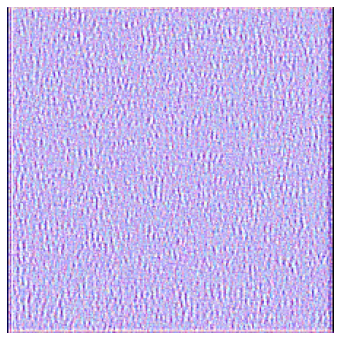

In [ ]:
iv.run_am(layer=2, filter=10, lr=0.5, iters=2, is_random=True) # iters нужно брать больше
iv.plot_am()

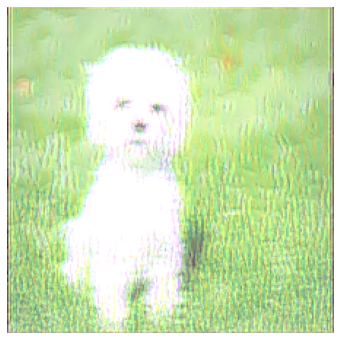

In [ ]:
iv.run_am(layer=2, filter=10, lr=0.5, iters=2, is_random=False)
iv.plot_am()

## Saliency Map

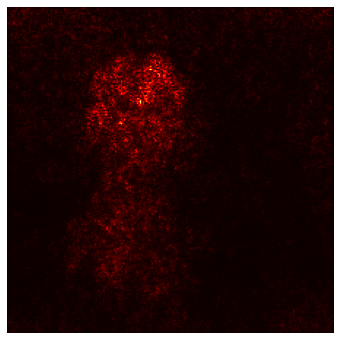

In [ ]:
iv.run_sm()
iv.plot_sm()

## Integrated Gradients

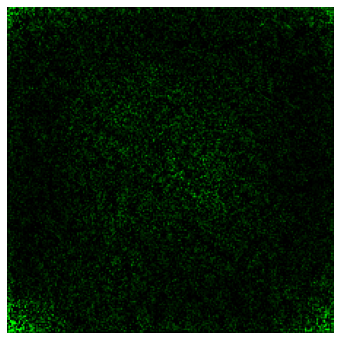

In [ ]:
iv.run_ig(steps=3) # steps нужно брать больше
iv.plot_ig()

## Архитектура

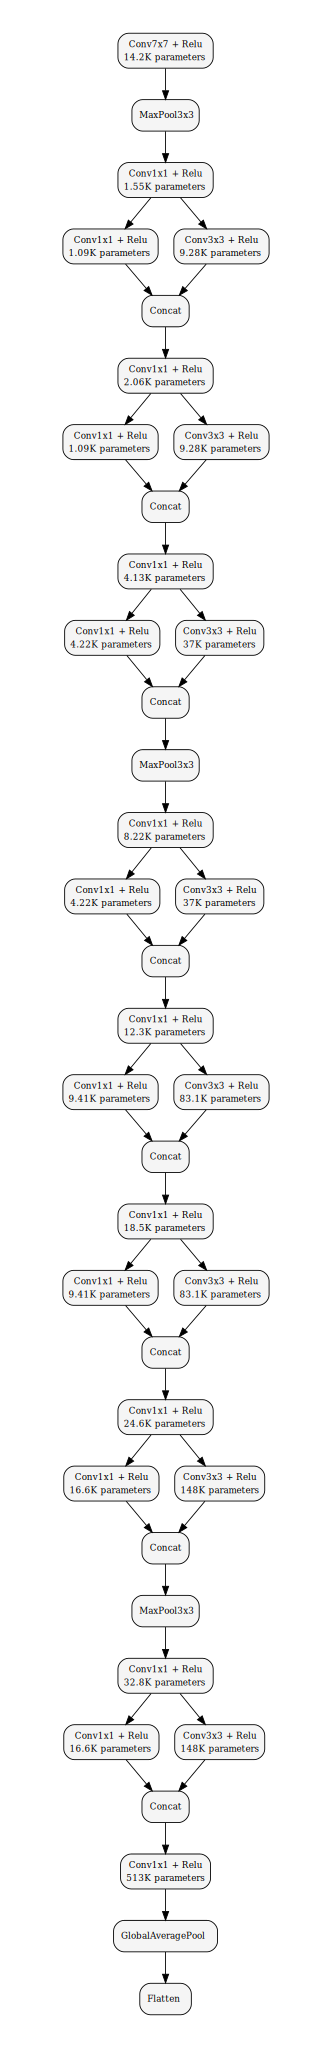

In [13]:
import architecture as arch

import torch
import torchvision.models
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = torchvision.models.SqueezeNet()
model.to(device)
model.eval()

graph = arch.build_graph(model, (torch.zeros([1, 3, 228, 228]).to(device)))
dot=graph.build_dot()
dot.attr("graph", rankdir="TD") #Topdown
# dot.attr("graph", rankdir="LR") #Left-Right
dot.render('SqueezeNet')

dot

Ждем отрисовку от Дани ;) Ниже банальные доступные способы

In [ ]:
iv.vis_arc_1()

>>> ('0', Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)))
>>> ('1', ReLU(inplace=True))
>>> ('2', Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)))
>>> ('3', ReLU(inplace=True))
>>> ('4', MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False))
>>> ('5', Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)))
>>> ('6', ReLU(inplace=True))
>>> ('7', Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)))
>>> ('8', ReLU(inplace=True))
>>> ('9', MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False))
>>> ('10', Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)))
>>> ('11', ReLU(inplace=True))
>>> ('12', Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)))
>>> ('13', ReLU(inplace=True))
>>> ('14', Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)))
>>> ('15', ReLU(inplace=True))
>>> ('16', MaxPool2d(kernel_size=2, stride=2, padding=0, dilation

In [ ]:
os.system('pip install torchinfo')
iv.vis_arc_2()

Layer (type:depth-idx)                   Param #
VGG                                      --
├─Sequential: 1-1                        --
│    └─Conv2d: 2-1                       1,792
│    └─ReLU: 2-2                         --
│    └─Conv2d: 2-3                       36,928
│    └─ReLU: 2-4                         --
│    └─MaxPool2d: 2-5                    --
│    └─Conv2d: 2-6                       73,856
│    └─ReLU: 2-7                         --
│    └─Conv2d: 2-8                       147,584
│    └─ReLU: 2-9                         --
│    └─MaxPool2d: 2-10                   --
│    └─Conv2d: 2-11                      295,168
│    └─ReLU: 2-12                        --
│    └─Conv2d: 2-13                      590,080
│    └─ReLU: 2-14                        --
│    └─Conv2d: 2-15                      590,080
│    └─ReLU: 2-16                        --
│    └─MaxPool2d: 2-17                   --
│    └─Conv2d: 2-18                      1,180,160
│    └─ReLU: 2-19                

In [ ]:
os.system('pip install torchsummary')
iv.vis_arc_3()

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6        [-1, 128, 112, 112]          73,856
              ReLU-7        [-1, 128, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]         147,584
              ReLU-9        [-1, 128, 112, 112]               0
        MaxPool2d-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         295,168
             ReLU-12          [-1, 256, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]         590,080
             ReLU-14          [-1, 256,

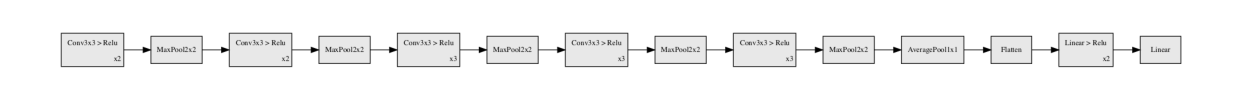

In [ ]:
os.system('pip install hiddenlayer')
iv.vis_arc_4()

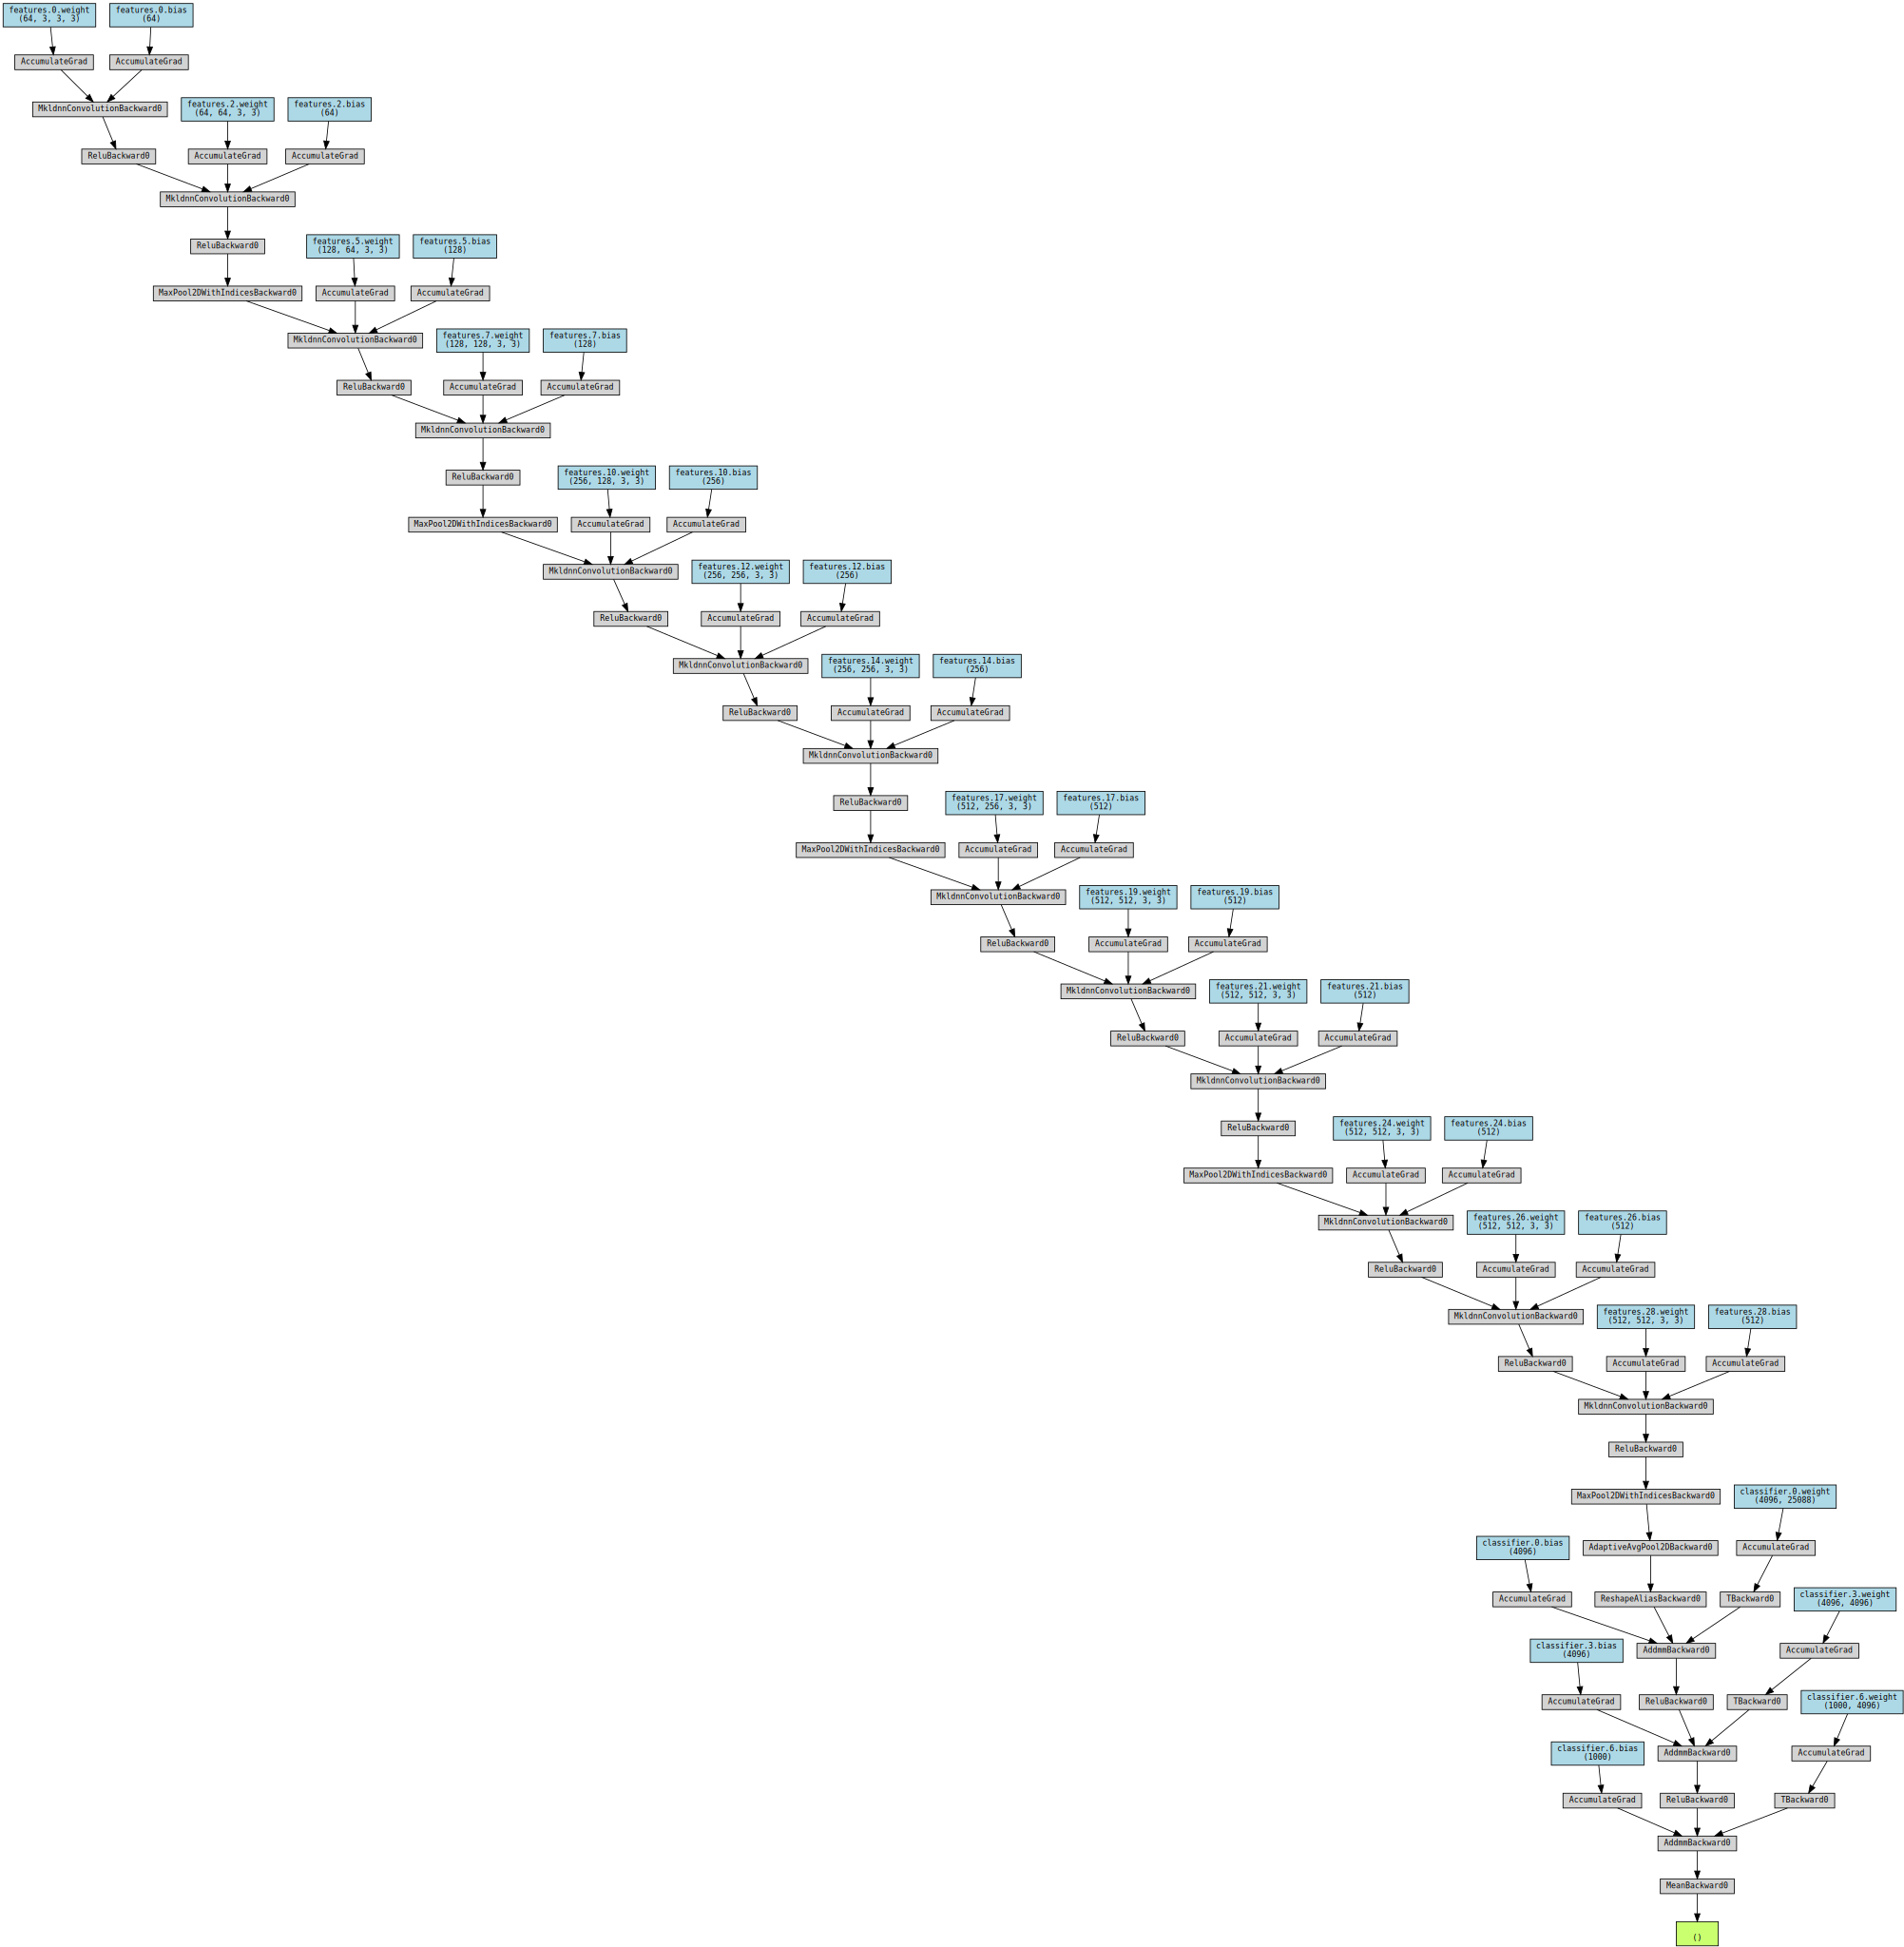

In [ ]:
os.system('pip install torchviz')
iv.vis_arc_5()

## TMP

In [ ]:
import torch
torch.hub.list('pytorch/vision', force_reload=True)

Downloading: "https://github.com/pytorch/vision/archive/main.zip" to /Users/andrei/.cache/torch/hub/main.zip


['alexnet',
 'deeplabv3_mobilenet_v3_large',
 'deeplabv3_resnet101',
 'deeplabv3_resnet50',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'efficientnet_b0',
 'efficientnet_b1',
 'efficientnet_b2',
 'efficientnet_b3',
 'efficientnet_b4',
 'efficientnet_b5',
 'efficientnet_b6',
 'efficientnet_b7',
 'fcn_resnet101',
 'fcn_resnet50',
 'googlenet',
 'inception_v3',
 'lraspp_mobilenet_v3_large',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet_v2',
 'mobilenet_v3_large',
 'mobilenet_v3_small',
 'regnet_x_16gf',
 'regnet_x_1_6gf',
 'regnet_x_32gf',
 'regnet_x_3_2gf',
 'regnet_x_400mf',
 'regnet_x_800mf',
 'regnet_x_8gf',
 'regnet_y_16gf',
 'regnet_y_1_6gf',
 'regnet_y_32gf',
 'regnet_y_3_2gf',
 'regnet_y_400mf',
 'regnet_y_800mf',
 'regnet_y_8gf',
 'resnet101',
 'resnet152',
 'resnet18',
 'resnet34',
 'resnet50',
 'resnext101_32x8d',
 'resnext50_32x4d',
 'shufflenet_v2_x0_5',
 'shufflenet_v2_x1_0',
 'squeezenet1_0',
 'squeezenet1_1',
 'vgg11',
 'vgg1